# Практика

Классы особенно удобны при наличии множества схожих объектов. В этом ноутбуке мы попробуем смоделировать сверх-упрощенную модель солнечной системы, используя классы. Для простоты в классе мы будем использовать следующие допущения:
- в нашей системе солнце неподвижно
- все планеты и спутники имеют круговую орбиту
- данные полученны из публичной таблицы, в качестве радиуса используем большую полуокружность.

[данные](http://www.allplanets.ru/solar_sistem.htm)

In [13]:
%matplotlib inline
import pylab as plt

from matplotlib.patches import Ellipse

In [14]:
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets

# Interaction

In [15]:
def f(x):
    return x

In [16]:
interact(f, x=IntSlider(10, max=3650, min=0, step=1));

10

# Model

In [17]:
from math import sin, cos, radians, pi

## Sun

в нашей системе солнце - самый простой объект. оно просто находится в центре и должно само себя рисовать

In [36]:
class Celestial(object):
    x, y = 0, 0
    name, color, size = None, None, None
    
    def __init__(self, name='Unidentified', color='yellow', size=100):
        self.name = name
        self.color = color
        self.size = size
    
    def calc_position(self, *args, **kwargs):
        pass
    
    def vis(self, ax=None, **kwargs):
        if ax is None:
            fig, ax = plt.subplots(**kwargs)

        ax.scatter(self.x, self.y, s=self.size, c=self.color)
        
        
        

In [37]:
sun = Celestial('Sun')

## Planets

планеты намного сложнее - они имеют радиус и скорость вращения, и должны уметь находить свою позицию относительно солнца 

In [48]:
class Planet(Celestial):
    
    def __init__(self,
                 name,
                 ocenter,
                 radius=10_000, period=365, 
                 start=0, *args, **kwargs):
        
        self.ocenter = ocenter  # home star
        self.radius = radius    # mln kms 
        self.period = period    # in days
        self.start = start      # in radians, TODO: change; we dont use it for now
        super().__init__(name=name, *args, **kwargs) # функция инит для Celestial
    
        self.calc_position(0)  # move to the start position on default

        
    def calc_position(self, days:int):
        # need to clarify start units
        angle = self.start + radians(360* (days / self.period))
        
        self.x = self.radius * cos(angle) + self.ocenter.x
        self.y = self.radius * sin(angle) + self.ocenter.y
        
    
    def draw_orbit(self, ax):
        orbit = Ellipse((self.ocenter.x, self.ocenter.y), 
                         self.radius*2, 
                         self.radius*2, 
                         facecolor='none', 
                         edgecolor='grey', linestyle='--')

        ax.add_artist(orbit)
    
    def vis(self, ax=None):
        'visualize planet on the plot'
        if ax is None:
            fig, ax = plt.subplots()

        self.draw_orbit(ax=ax)  # we want to draw it before the object itself
        super().vis(ax=ax)

In [51]:
earth = Planet(name='Earth', ocenter=sun, color='blue', size=50, radius=5000)

(-15000, 15000)

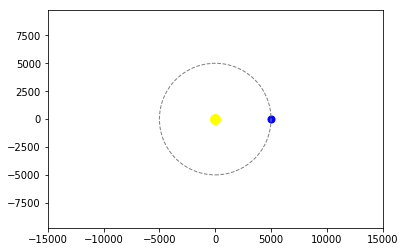

In [52]:
fig, ax = plt.subplots()
sun.vis(ax=ax)
earth.vis(ax=ax)

ax.axis('equal');
ax.set_xlim(-15_000, 15_000)
ax.set_ylim(-15_000, 15_000)

In [53]:
earth.calc_position(180)

(-15000, 15000)

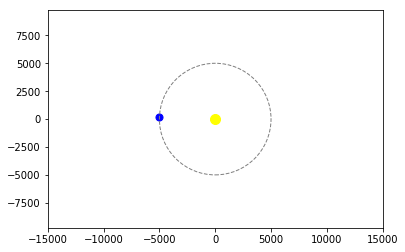

In [54]:
fig, ax = plt.subplots()

sun.vis(ax=ax)
earth.vis(ax=ax)

ax.axis('equal');
ax.set_xlim(-15_000, 15_000)
ax.set_ylim(-15_000, 15_000)

# Interaction

In [55]:
bodies = [sun, earth, ]

In [56]:
def update_all(days):
    fig, ax = plt.subplots(figsize=(12,12))
    
    for body in bodies:
        body.calc_position(days)
        body.vis(ax)
    
    ax.axis('equal');
    ax.set_xlim(-15_000, 15_000)
    ax.set_ylim(-15_000, 15_000)
    plt.axis('off')

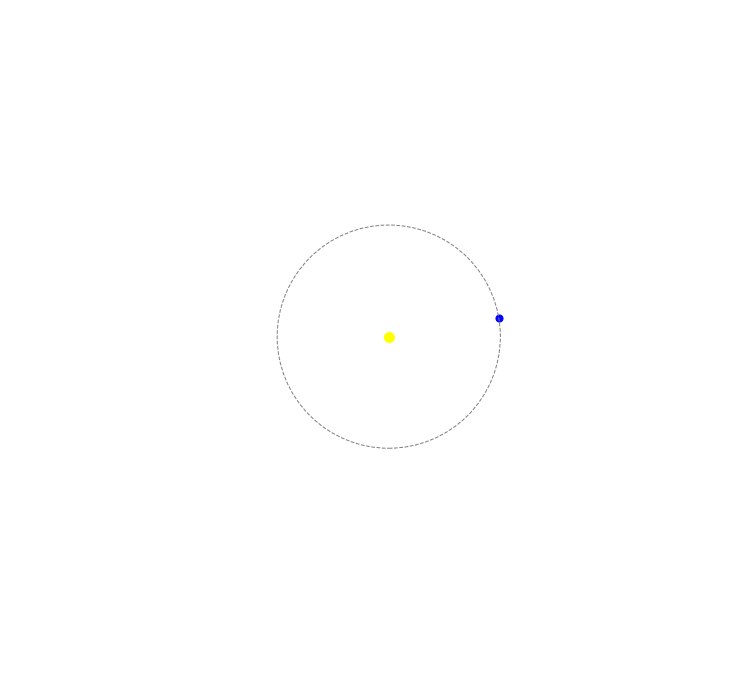

In [57]:
interact(update_all, days=IntSlider(10, max=365, min=0, step=1));

# Sattellite

In [60]:
class Satellite(Planet):
    '''rotates around the planet'''
    
        

In [64]:
moon = Satellite(name='Луна', ocenter=earth, radius=10, period=27, color='grey')

## Whole System

In [68]:
planets_data = [
    {"name":'Меркурий', 'radius':46, 'color':'orange', 'period':88},
    {"name":'Венера', 'radius':108, 'color':'yellow', 'period':225},
    {"name":'Земля', 'radius':147, 'color':'blue', 'period':365},
    {"name":'Марс', 'radius':206, 'color':'red', 'period':687},
#     {"name":'Юпитер', 'radius':740, 'color':'orange', 'period':11857, 'satellites': 62},
#     {"name":'Сатурн', 'radius':13495, 'color':'grey', 'period':294, 'satellites': 34},
#     {"name":'Уран', 'radius':27356, 'color':'purple', 'period':8402, 'satellites': 27},
#     {"name":'Нептун', 'radius':44596, 'color':'darkblue', 'period':16479, 'satellites': 13},
#     {"name":'Плутон', 'radius':44368, 'color':'black', 'period':24792, 'satellites': 5},
    
]

In [72]:
planets = {planet['name']: Planet(size=100, ocenter=sun, **planet) for planet in planets_data}

In [78]:
moon = Satellite(name='Луна', ocenter=planets['Земля'], radius=10, period=27, color='grey')

In [79]:
system = {'sun': sun, 'moon': moon, **planets}

In [80]:
moon.ocenter.x

147.0

# Visualise

In [81]:
def update_all(days):
    fig, ax = plt.subplots(figsize=(12,12))
    
    for body in system.values():
        body.calc_position(days)
        body.vis(ax)
    
    ax.axis('equal');
#     ax.set_xlim(-15_000, 15_000)
#     ax.set_ylim(-15_000, 15_000)
    plt.axis('off')

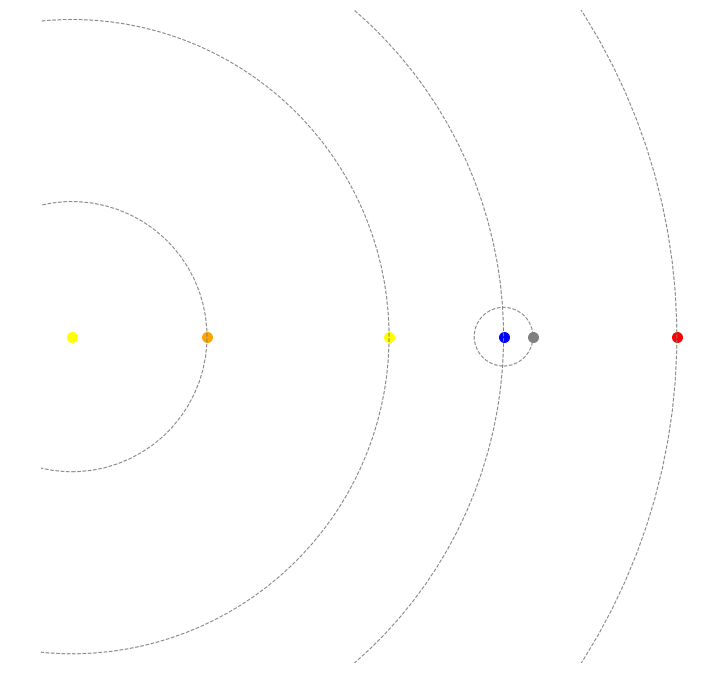

In [82]:

interact(update_all, days=IntSlider(0, max=365, min=0, step=1));


## Whats next

- подклеить сателлиты к планетам, так чтобы при инициализации планеты / визуализации планеты спутники бы появлялись сами по себе
- создать класс Solar System для простоты генерации системы
- подумать над красивыми настройками стиля объекта
- подумать над более красивым методом визуализации